In [1]:
import sys
sys.path.append('../')
import nexullance.LP_gurobi as LP
import topologies.Slimfly as Slimfly
import globals as gl
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
config=(50, 7)
EPR=4
topo='slimfly'
_network=Slimfly.Slimflytopo(config[0], config[1])
edge_list=list(_network.nx_graph.edges())


# Shift traffic

In [3]:
p2p_traffic_matrix=gl.generate_shift_traffic_pattern(config[0], EPR)
R2R_matrix=gl.convert_p2p_traffic_matrix_to_R2R(p2p_traffic_matrix, config[0], EPR)

nexullance-APST-4

In [5]:
results, _, path_dict = gl.calculate_data_paths_within_length(_network, config, 4)
local_link_load=gl.local_link_loads_from_p2p_TM(p2p_traffic_matrix)
link_loads=_network.distribute_arbitrary_flow_on_paths(R2R_matrix, path_dict)
link_loads=list(link_loads.values())
print(f'predicted saturation load (before optimization) = {max(local_link_load)/max(link_loads)}')
# display(results)
all_weighted_paths, result_link_loads=LP.Solve_load_balancing(path_dict, edge_list,R2R_matrix, _verbose=0)
link_loads=list(result_link_loads.values())
print(f'predicted saturation load (after optimization) = {max(local_link_load)/max(link_loads)}')

calculation done for (50, 7) with shorter-than-4 paths routing
predicted saturation load (before optimization) = 0.4021739130434783
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2411299
Academic license - for non-commercial use only - registered to ziyue.zhang@ugent.be
number of variables = 91000, number of constraints = 2800
Set parameter Threads to value 1
Optimal solution found
Max link load is: 1.7142857142857144
predicted saturation load (after optimization) = 0.5833333333333077


In [6]:
all_weighted_paths, result_link_loads=LP.Solve_load_balancing_half_ILP(path_dict, edge_list,R2R_matrix, _verbose=0)
link_loads=list(result_link_loads.values())
print(f'predicted saturation load (after 0-0.5 ILP optimization) = {max(local_link_load)/max(link_loads)}')

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2411299
Academic license - for non-commercial use only - registered to ziyue.zhang@ugent.be
number of variables = 91000, number of constraints = 2800
Set parameter Threads to value 1
Optimal solution found
Max link load is: 2.0
predicted saturation load (after 0-0.5 ILP optimization) = 0.5


check the selected path lengths

In [7]:
nexullance_path_length_stat={}
for s_d, weighted_paths in all_weighted_paths.items():
    if R2R_matrix[s_d[0]][s_d[1]]==0:
        continue
    # input_path_len_stat=[]
    paths_stat=[]
    for path, weight in weighted_paths:
        path_length=len(path)-1
        if round(weight, 3)>0:
            paths_stat.append([path_length, weight])
    nexullance_path_length_stat[s_d]=paths_stat

Text(0, 0.5, 'frequency')

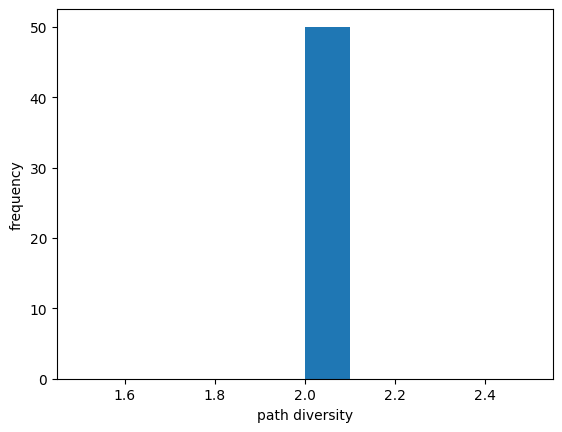

In [8]:
# path diversity
data=[]
for paths_stat in nexullance_path_length_stat.values():
    data.append(len(paths_stat))
plt.hist(data)
plt.xlabel("path diversity")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

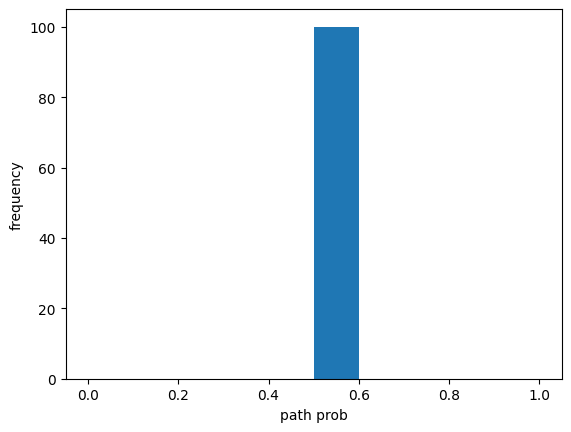

In [9]:
# path prob
data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        data.append(round(path_stat[1], 3))
plt.hist(data, range=(0,1))
plt.xlabel("path prob")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

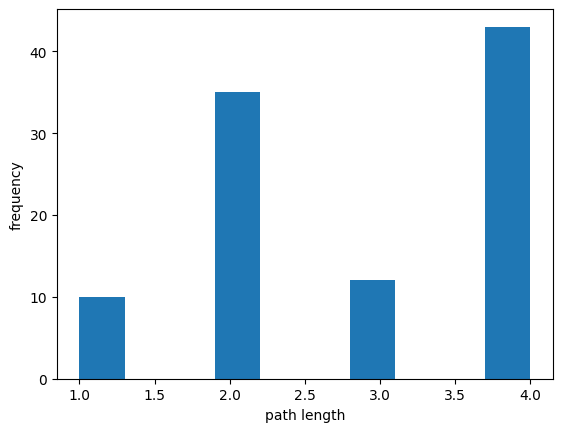

In [10]:
# path length
data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        data.append(path_stat[0])
plt.hist(data)
plt.xlabel("path length")
plt.ylabel("frequency")

Text(0, 0.5, 'path prob')

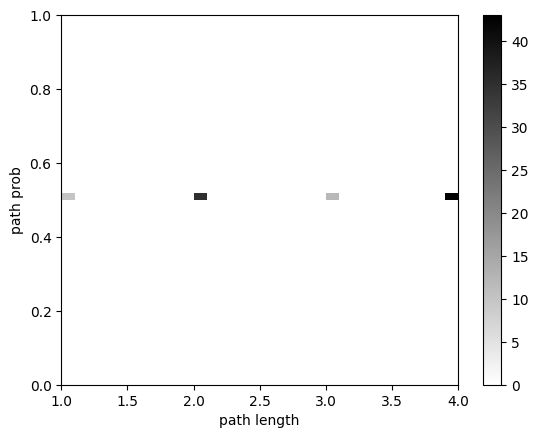

In [11]:
# 2-d: path length and path prob
path_length_data=[]
path_prob_data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        path_length_data.append(path_stat[0])
        path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.xlabel("path length")
plt.ylabel("path prob")

Text(0.5, 1.0, 'only s-d with distance=1')

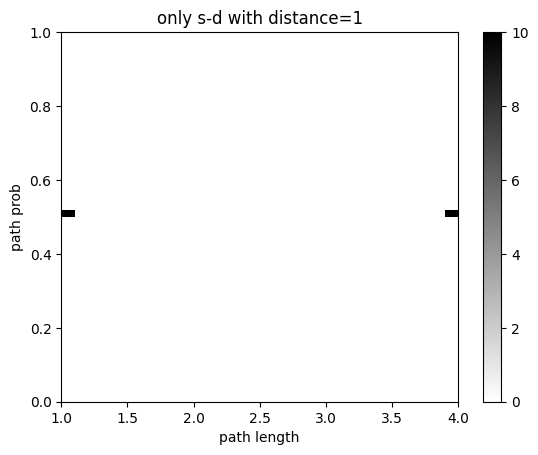

In [12]:
# 2-d: path length and path prob, for those s-d with distance=1
path_length_data=[]
path_prob_data=[]
for (s, d), paths_stat in nexullance_path_length_stat.items():
    if nx.shortest_path_length(_network.nx_graph, s, d)==1:
        for path_stat in paths_stat:
            path_length_data.append(path_stat[0])
            path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.clim(0)
plt.xlabel("path length")
plt.ylabel("path prob")
plt.title("only s-d with distance=1")


Text(0.5, 1.0, 'only s-d with distance=2')

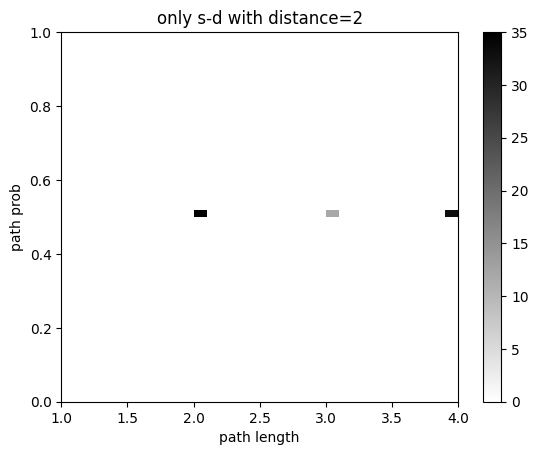

In [13]:
# 2-d: path length and path prob, for those s-d with distance=2
path_length_data=[]
path_prob_data=[]
for (s, d), paths_stat in nexullance_path_length_stat.items():
    if nx.shortest_path_length(_network.nx_graph, s, d)==2:
        for path_stat in paths_stat:
            path_length_data.append(path_stat[0])
            path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.clim(0)
plt.xlabel("path length")
plt.ylabel("path prob")
plt.title("only s-d with distance=2")
